## PyTorch 소개
- 딥러닝 연구와 개발을 위한 오픈 소스 머신러닝 라이브러리로, 다양한 딥러닝 모델을 구축하고 학습시키기 위한 강력한 도구와 API를 제공합니다.
- PyTorch는 'define-by-run' 접근 방식을 사용하여, 모델을 실행하는 동안 계산 그래프를 동적으로 구성합니다. 이는 개발 과정에서 더 많은 유연성을 제공하며, 디버깅과 모델 수정을 쉽게 만들어 줍니다.
- Pythonic한 디자인을 갖추고 있어, Python 및 NumPy와 긴밀하게 통합되어 있습니다. 이로 인해 사용자는 Python의 기본 기능을 최대한 활용할 수 있으며, PyTorch 코드를 쉽게 작성하고 이해할 수 있습니다.
- 모듈을 통해, 모델의 파라미터에 대한 그래디언트(가중치의 기울기)를 자동으로 계산할 수 있습니다. 이 기능은 모델 학습 시 역전파(오차 업데이트)를 간단하게 구현할 수 있게 해 줍니다.
- 전반적으로 유연한 설계를 가지고 있으며, 사용자가 모델의 세부 사항을 더 세밀하게 제어할 수 있게 합니다.



## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능(원래 numpy scikitlearn 는 GPU가 안됨)

[ ndarray와 텐서 비교 ]
- GPU 지원: PyTorch의 Tensor와 TensorFlow의 텐서는 GPU를 통한 가속을 지원. 이는 대규모 배열 연산에서 상당한 성능 향상을 가져올 수 있는 반면, NumPy ndarray는 기본적으로 CPU에서만 작동.
- 자동 미분 지원: PyTorch와 TensorFlow는 딥러닝 모델 학습을 위해 자동 미분을 지원하는 반면, NumPy는 이러한 기능을 내장하고 있지 않다. 이는 신경망의 역전파와 같은 복잡한 연산을 구현할 때 중요한 차이점이다.(가중치들을 손실함수를 최소화되도록 업데이트 해야하는데.. 즉 기울기 순간변화율 - 비용함수최소화하는 것들로 모델을 결정을 하면 됨 근데 그때 가중치가 많은데, 그때 편미분을 함. )
- API 호환성: PyTorch와 TensorFlow/Keras는 NumPy와의 호환성을 중시하며, 많은 경우에 NumPy의 API를 모방. 이는 NumPy 사용자가 쉽게 이러한 프레임워크로 전환할 수 있도록 돕는다. 그러나 각 프레임워크는 자체적인 최적화와 기능을 제공하기 때문에, 모든 NumPy 연산이 그대로 사용될 수 있는 것은 아니다.

[ PyTorch와 TensorFlow/Keras에서의 ndarray 사용 ]
- PyTorch에서의 사용: PyTorch는 torch.from_numpy() 함수를 통해 NumPy ndarray를 PyTorch의 Tensor로 변환할 수 있다. 변환된 텐서는 원래 ndarray와 메모리를 공유하기 때문에, 한 객체의 변경이 다른 객체에도 반영된다. 반대로, .numpy() 메소드를 사용하여 PyTorch 텐서를 NumPy 배열로 변환할 수 있다.
- TensorFlow/Keras에서의 사용: TensorFlow에서는 tf.convert_to_tensor() 함수를 사용하여 NumPy ndarray를 TensorFlow의 텐서로 변환할 수 있다. 이 변환된 텐서는 TensorFlow 연산에 사용될 수 있다. TensorFlow 텐서를 NumPy 배열로 변환하기 위해서는 .numpy() 메소드를 사용할 수 있다.

PyTorch와 TensorFlow/Keras 모두 NumPy ndarray와의 상호 운용성을 지원하며, 이를 통해 각 프레임워크의 텐서로 쉽게 변환할 수 있다. 각 프레임워크의 텐서는 GPU 지원과 자동 미분과 같은 추가적인 기능을 제공하여 딥러닝 모델의 개발과 학습을 효율적으로 할 수 있게 한다.

3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용 - 흑백 이미지는 컬러 채널을 생략하기도 함. 이때는 4D가 아닌 3D가 됨

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

PyTorch 텐서의 주요 dtype:

부동 소수점 타입:
- torch.float64 또는 torch.double: 64-bit 부동 소수점
- torch.float32 또는 torch.float: 32-bit 부동 소수점 (기본값)
- torch.float16 또는 torch.half: 16-bit 부동 소수점. 메모리를 절약하고 계산 속도를 높이고자 할 때 유용
- torch.bfloat16: 16-bit 부동 소수점, reduced precision than torch.float16. 넓은 수치 범위를 다뤄야 하며 하드웨어 지원이 있는 환경에서 대규모 딥러닝 모델 학습에 더 적합

정수 타입:
- torch.int64 또는 torch.long: 64-bit 정수
- torch.int32 또는 torch.int: 32-bit 정수
- torch.int16 또는 torch.short: 16-bit 정수
- torch.int8: 8-bit 정수
- torch.uint8: 8-bit 부호 없는(unsigned) 정수. 0부터 255까지의 정수 값을 표현할 수 있으며, 주로 이미지 데이터를 다룰 때 사용

In [ ]:
# 비트가 높으면 정밀한 반면에 메모리가 많이 소요된다.
# 예를 들어, 그래픽 처리나 머신러닝에서 대량의 데이터 처리시에는 float32,
# 과학적 계산이나 금융 모델링 같이 정밀도가 필요한 경우 float64 사용.(torch.float16 에서는 15-17진수 까지 가능)
import torch

# Float32 tensor
tensor_float32 = torch.randn(3, 4) # 정규분포를 이루는 3행 4열 짜리를 만듦
# default 가 32비트로 되어있음.

tensor_float32

tensor([[ 0.8011,  0.1219, -1.0125,  0.1818],
        [-0.0174, -1.1910,  0.4616, -1.3121],
        [ 0.4252,  0.4685, -0.0652,  1.2411]])

In [ ]:
tensor_float64 = tensor_float32.to(dtype=torch.float64)
tensor_float64
# 타입 바꿔도 결과는 같고 타입만 바뀜. 이때는 32 로 쓰는게 좋음(메모리 절약)

tensor([[ 0.8011,  0.1219, -1.0125,  0.1818],
        [-0.0174, -1.1910,  0.4616, -1.3121],
        [ 0.4252,  0.4685, -0.0652,  1.2411]], dtype=torch.float64)

In [ ]:
# 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공
import math

a = torch.randn(1,2) * 2 - 1 # 표준 정규 분포(평균 = 0, 표준 편차 = 1)에서 가져온 값의 각 요소에 2를 곱한 다음 1을 뺀다.
print(a)
print("절대값(abs):", torch.abs(a)) # 절대값
print("천장(ceil):", torch.ceil(a)) # 텐서 a의 각 요소에 천장 함수를 적용. ex) -2.1731 의 천장은 -2. 2.1731의 천장은 3
print("바닥(floor):", torch.floor(a)) # 텐서 a의 각 요소에 바닥 함수를 적용 ex) -2.1731 의 바닥은 -3. 2.1731의 바닥은 2
print("clamp함수:", torch.clamp(a,-0.5,0.5))
# '-0.5' 이하의 값은 '-0.5'로 설정되고, '0.5' 이상의 값은 '0.5'로 설정. ex) -2.1731은 -0.5, 2.1731은 0.5

tensor([[-2.3617, -0.4285]])
절대값(abs): tensor([[2.3617, 0.4285]])
천장(ceil): tensor([[-2., -0.]])
바닥(floor): tensor([[-3., -1.]])
clamp함수: tensor([[-0.5000, -0.4285]])


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
x = torch.rand(2,2) # 무작위로 생성된 행렬을 반환
print(x)
y = torch.rand(2,2)
print(y)
print(x)
print(y)
print()
y.add_(x) #  _가 있는 add_는 메서드가 y 자체를 변경한다는 의미이며 y의 값이 변경
print(y) # 원본 y 가 바뀜(add_ 함수로 x를 더함.)

tensor([[0.4803, 0.7577],
        [0.6774, 0.0802]])
tensor([[0.5193, 0.4231],
        [0.8718, 0.9108]])
tensor([[0.4803, 0.7577],
        [0.6774, 0.0802]])
tensor([[0.5193, 0.4231],
        [0.8718, 0.9108]])

tensor([[0.9997, 1.1808],
        [1.5492, 0.9910]])


`torch.mm`: 내적(dot product)

In [ ]:
x = torch.rand(2,2)
print(x)
print(y, '\n')
print(torch.matmul(x,y), '\n')
z = torch.mm(x,y) # torch.matmul = torch.mm
print(z)

tensor([[0.3327, 0.7171],
        [0.6102, 0.4801]])
tensor([[1.1295, 1.2627],
        [1.2542, 0.4179]]) 

tensor([[1.2753, 0.7198],
        [1.2914, 0.9711]]) 

tensor([[1.2753, 0.7198],
        [1.2914, 0.9711]])


인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
import torch
x = torch.Tensor([[1, 2], [3, 4]]) # torch.Tensor() 로 만들기.
print(x)

# numpy 처럼 인덱싱으로 사용할수 있음
print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])
print(x[:, 0])
print(x[:, 1])
print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


Q. 주어진 텐서 t에 대하여 다음을 수행하세요.
- 텐서 t의 두 번째 행을 선택하세요.
- 텐서 t의 첫 번째 열을 선택하세요.
- 텐서 t의 마지막 열을 선택하세요.
- 텐서 t의 대각선에 있는 요소들을 선택하세요.
- 텐서 t의 첫 두 행과 첫 두 열에 있는 요소들을 선택하여 부분 행렬을 만드세요.

In [ ]:
# 주어진 텐서 t
import torch

# Create a sample tensor for indexing exercises
t = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [ ]:
# A.
print("두 번째 행:", t[1,:])
print("첫 번째 행:", t[:,1])
print("마지막 열:", t[:,-1])
print("대각선:", torch.diag(t))
print("부분 행렬:", t[0:2, 0:2])

두 번째 행: tensor([4, 5, 6])
첫 번째 행: tensor([2, 5, 8])
마지막 열: tensor([3, 6, 9])
대각선: tensor([1, 5, 9])
부분 행렬: tensor([[1, 2],
        [4, 5]])


º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성


In [ ]:
import torch

# Create a tensor with random values
tensor_rand = torch.rand(3, 3)
existing_tensor = torch.tensor([[1,2], [3,4]])
tensor_rand_like = torch.rand_like(existing_tensor, dtype=torch.float)
tensor_randn = torch.randn(3,3)
tensor_randn_like = torch.randn_like(existing_tensor, dtype=torch.float)
tensor_randint = torch.randint(0, 10, (3,3)) # 10은 제외
tensor_randint_like = torch.randint_like(existing_tensor, low=0, high=10, dtype=torch.int)
tensor_randperm = torch.randperm(10) # 10은 제외

tensor_rand, existing_tensor, tensor_rand_like, tensor_randn, tensor_randn_like, tensor_randint, tensor_randint_like, tensor_randperm

(tensor([[0.3640, 0.1827, 0.0272],
         [0.1297, 0.8369, 0.3662],
         [0.4514, 0.0925, 0.0220]]),
 tensor([[1, 2],
         [3, 4]]),
 tensor([[0.4732, 0.3169],
         [0.0396, 0.1843]]),
 tensor([[-1.4027, -1.7395, -0.1041],
         [-1.2078,  1.3834,  1.4691],
         [ 0.0499,  1.0223, -0.2353]]),
 tensor([[-0.0750,  0.4926],
         [-1.3268, -0.1557]]),
 tensor([[1, 5, 4],
         [2, 1, 0],
         [6, 8, 5]]),
 tensor([[4, 4],
         [3, 5]], dtype=torch.int32),
 tensor([9, 1, 4, 7, 2, 0, 6, 3, 8, 5]))

Q. 파이토치 랜덤 값으로 다음 사항을 수행하세요.
- 연습 1: 0과 1 사이의 균등 분포에서 난수를 생성하여 3행 5열 텐서를 만드세요.
- 연습 2: 평균이 0이고 표준편차가 1인 정규 분포에서 난수를 생성하여 2행 3열 텐서를 만드세요.
- 연습 3: 0부터 9까지의 범위에서 균등 분포 정수 난수를 생성하여 3행 3열 텐서를 만드세요.
- 연습 4: 0부터 9까지의 숫자를 무작위로 섞어서 텐서를 만드세요.
- 연습 5: -10부터 10까지 5개의 균등한 간격으로 나뉜 실수 값을 가진 텐서를 만드세요.

In [ ]:
# 연습 1: 0과 1 사이의 균등 분포에서 난수를 생성하여 3행 5열 텐서를 만드세요.
practice1 = torch.rand(3, 5)
practice1

tensor([[0.8247, 0.0612, 0.4525, 0.7226, 0.9844],
        [0.6782, 0.5540, 0.2289, 0.9683, 0.5535],
        [0.7457, 0.0484, 0.0518, 0.3970, 0.6528]])

In [ ]:
# 연습 2: 평균이 0이고 표준편차가 1인 정규 분포에서 난수를 생성하여 2행 3열 텐서를 만드세요.
practice2 = torch.randn(2, 3)
practice2

tensor([[ 0.4215, -1.3039, -0.6938],
        [ 0.0562, -1.3942,  1.7088]])

In [ ]:
# 연습 3: 0부터 9까지의 범위에서 균등 분포 정수 난수를 생성하여 3행 3열 텐서를 만드세요.
practice3 = torch.randint(0, 10, (3,3))
practice3

tensor([[6, 4, 9],
        [5, 2, 1],
        [7, 0, 9]])

In [ ]:
# 연습 4: 0부터 9까지의 숫자를 무작위로 섞어서 텐서를 만드세요.
practice4 = torch.randperm(10)
practice4

tensor([1, 0, 9, 2, 7, 4, 6, 8, 5, 3])

In [ ]:
# 연습 5: -10부터 10까지 5개의 균등한 간격으로 나뉜 실수 값을 가진 텐서를 만드세요.
practice5 = torch.linspace(-10, 10, steps=5)
practice5

tensor([-10.,  -5.,   0.,   5.,  10.])

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

In [ ]:
# Create a tensor with a specific value
tensor_arange = torch.arange(0,10)
tensor_ones = torch.ones(3,3)
tensor_zeros = torch.zeros(3,3)
tensor_ones_like = torch.ones_like(existing_tensor)
tensor_zeros_like = torch.zeros_like(existing_tensor)
tensor_linspace = torch.linspace(0, 10, steps=5)
tensor_logspace = torch.logspace(start=-1, end=1, steps=5) # start가 -1 인데 0.1로 시작해서 10까지에서 5개 스텝으로..
# 로그. 밑을 10으로 함. start=-1 -> 10의 -1승은 0.1, end=1 -> 10의 1승은 10

# Output for demonstration
tensor_arange, tensor_ones, tensor_ones_like, tensor_zeros_like, tensor_linspace, tensor_logspace

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1, 1],
         [1, 1]]),
 tensor([[0, 0],
         [0, 0]]),
 tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000]),
 tensor([ 0.1000,  0.3162,  1.0000,  3.1623, 10.0000]))

In [ ]:
# Create a tensor with a specific value
tensor_arange = torch.arange(0, 10)  # 1
tensor_ones = torch.ones(3, 3)  # 2
tensor_zeros = torch.zeros(3, 3)  # 3
tensor_ones_like = torch.ones_like(existing_tensor)  # 4
tensor_zeros_like = torch.zeros_like(existing_tensor)  # 5
tensor_linspace = torch.linspace(0, 10, steps=5)  # 6
tensor_logspace = torch.logspace(start=-1, end=1, steps=5)  # 7

# Output for demonstration
tensor_arange, tensor_ones, tensor_zeros, tensor_ones_like, tensor_zeros_like, tensor_linspace, tensor_logspace


(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1, 1],
         [1, 1]]),
 tensor([[0, 0],
         [0, 0]]),
 tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000]),
 tensor([ 0.1000,  0.3162,  1.0000,  3.1623, 10.0000]))

#### Python 에서 size와 shape는 텐서의 차원을 나타내는 데 사용되며 사실상 같은 기능을 제공. 차이는 size가 메소드인데 반하여 shape는 속성.

`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
# view() 함수는 텐서의 크기를 변경
# reshape 기능의 view()
x = torch.randn(4,5)
print(x, '\n')

y = x.view(20)
print(y, '\n')
z = x.view(5,-1)
print(z)

print(x.view(-1))

tensor([[ 0.7931,  0.0760, -0.3839,  1.1723, -0.6292],
        [ 0.3104,  0.7929, -0.5998,  0.3525,  0.1950],
        [ 0.7707,  0.3076,  0.9732, -0.1813, -1.4114],
        [ 1.0128,  0.6976,  0.7464, -2.4147, -1.1220]]) 

tensor([ 0.7931,  0.0760, -0.3839,  1.1723, -0.6292,  0.3104,  0.7929, -0.5998,
         0.3525,  0.1950,  0.7707,  0.3076,  0.9732, -0.1813, -1.4114,  1.0128,
         0.6976,  0.7464, -2.4147, -1.1220]) 

tensor([[ 0.7931,  0.0760, -0.3839,  1.1723],
        [-0.6292,  0.3104,  0.7929, -0.5998],
        [ 0.3525,  0.1950,  0.7707,  0.3076],
        [ 0.9732, -0.1813, -1.4114,  1.0128],
        [ 0.6976,  0.7464, -2.4147, -1.1220]])
tensor([ 0.7931,  0.0760, -0.3839,  1.1723, -0.6292,  0.3104,  0.7929, -0.5998,
         0.3525,  0.1950,  0.7707,  0.3076,  0.9732, -0.1813, -1.4114,  1.0128,
         0.6976,  0.7464, -2.4147, -1.1220])


In [ ]:
# 'item': 텐서에서 값에서 숫자값을 얻을 수 있음. 1by1행렬에서만 사용할 수 있음.
x = torch.randn(1)
# x = torch.randn(2) # 1개가 아니라 2로 하게 되면 오류가 나는데, 1개 일때만 사용가능함
print(x)
print(x.item()) # item() 함수는 텐서의 값을 Python의 숫자로 반환하며 텐서에서 값만 추출
print(x.dtype)

tensor([-0.7034])
-0.703370213508606
torch.float32


squeeze() 함수는 크기가 1인 입력 텐서의 모든 차원을 제거하는 데 사용
- dim이 제공되지 않으면 squeeze()는 텐서에서 크기 1의 모든 차원을 제거
- dim이 제공되면 크기가 1인 경우에만 지정된 차원만 제거. 즉 (1, 2, 1, 3)인 텐서가 있고 dim이 2이면 결과의 크기는 (1, 2, 3)

In [ ]:
# `squeeze`: 차원을 축소(제거)
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

t = tensor.squeeze()
print(t)
print(t.shape)
# 3차원인데 층이 1개 였어서(크기가 1인 경우 지정된 차원을 제거) 층이 사라지고 2차원만 남음

tensor([[[0.7190, 0.3570, 0.8358],
         [0.6716, 0.3720, 0.9981],
         [0.8401, 0.1728, 0.8925]]])
torch.Size([1, 3, 3])
tensor([[0.7190, 0.3570, 0.8358],
        [0.6716, 0.3720, 0.9981],
        [0.8401, 0.1728, 0.8925]])
torch.Size([3, 3])


tensor.unsqueeze(dim=2)

- unsqueeze 함수는 텐서에 새로운 차원을 추가. 여기서 dim=2는 새로운 차원이 추가될 위치를 나타내며 기존 텐서의 모든 차원의 인덱스를 증가시키고, 새로운 차원은 dim=2에 위치.

- 원래 텐서의 모양(shape)이 (3, 4)이었다면, unsqueeze(dim=2)를 적용한 후의 모양은 (3, 4, 1)이 됩니다. 따라서, 이 코드에서는 기존 텐서에 1차원을 추가

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)
# 2차원이었는데 3차원으로 차원업해줌

tensor([[0.6954, 0.9890, 0.6538],
        [0.0688, 0.8689, 0.6390],
        [0.5310, 0.4162, 0.0866]])
torch.Size([3, 3])
tensor([[[0.6954, 0.9890, 0.6538],
         [0.0688, 0.8689, 0.6390],
         [0.5310, 0.4162, 0.0866]]])
torch.Size([1, 3, 3])


In [ ]:
tensor.shape

torch.Size([1, 3, 3])

In [ ]:
tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)
# [1,3,3] 이었는데 dim=2자리(인덱스2) 에 차원 하나를 추가 그래서 [1,3,1(추가),3] 이렇게 됨

tensor([[[[0.6954, 0.9890, 0.6538]],

         [[0.0688, 0.8689, 0.6390]],

         [[0.5310, 0.4162, 0.0866]]]])
torch.Size([1, 3, 1, 3])


Q. 아래 텐서를 torch.Size([3, 5])로 변경하세요.

In [ ]:
# 주어진 텐서
import torch

# 초기 텐서 생성
tensor_for_squeeze = torch.randn(1, 3, 1, 5)
print("차원 축소 전 텐서 (squeeze 전):\n", tensor_for_squeeze)
print("차원 축소 전 형태:", tensor_for_squeeze.shape)

차원 축소 전 텐서 (squeeze 전):
 tensor([[[[-1.0263,  1.6038,  1.1499, -1.0408, -0.8213]],

         [[ 0.1637, -0.4179,  0.2153, -0.6421, -1.6621]],

         [[-1.8789,  0.3394,  0.0436, -0.9087, -1.4259]]]])
차원 축소 전 형태: torch.Size([1, 3, 1, 5])


In [ ]:
# A.
t = tensor_for_squeeze.squeeze() # dim 을 안주고 squeeze()함수 쓰면 크기가 1인 차원을 모두 제거
t, t.shape

(tensor([[-1.0263,  1.6038,  1.1499, -1.0408, -0.8213],
         [ 0.1637, -0.4179,  0.2153, -0.6421, -1.6621],
         [-1.8789,  0.3394,  0.0436, -0.9087, -1.4259]]),
 torch.Size([3, 5]))

Q. 아래 텐서를 torch.Size([1, 3, 5])로 변경하세요.

In [ ]:
# 초기 텐서 생성
tensor_for_unsqueeze = torch.randn(3, 5)
print("\n차원 확장 전 텐서 (unsqueeze 전):\n", tensor_for_unsqueeze)
print("차원 확장 전 형태:", tensor_for_unsqueeze.shape)


차원 확장 전 텐서 (unsqueeze 전):
 tensor([[-0.0961, -1.9999,  0.0560, -0.8750,  0.2082],
        [-1.0046,  0.9410, -1.5435,  0.4429,  0.5584],
        [-0.6139, -0.7685, -1.0731, -0.6651, -0.6774]])
차원 확장 전 형태: torch.Size([3, 5])


In [ ]:
# A.
t = tensor_for_unsqueeze.unsqueeze(dim=0)
# t = tensor_for_unsqueeze.unsqueeze() # 이 상황에선 dim을 생략해줘도됨
t, t.shape

(tensor([[[-0.0961, -1.9999,  0.0560, -0.8750,  0.2082],
          [-1.0046,  0.9410, -1.5435,  0.4429,  0.5584],
          [-0.6139, -0.7685, -1.0731, -0.6651, -0.6774]]]),
 torch.Size([1, 3, 5]))

Q. 2행 3열 텐서의 크기를 3행 2열로 변경하세요.
- view 사용
- reshape 사용
- transpose 사용

In [ ]:
# 주어진 텐서
import torch

# 초기 텐서 생성
initial_tensor = torch.randn(2, 3)
print("초기 텐서:\n", initial_tensor)

초기 텐서:
 tensor([[-1.2727,  0.8804,  3.4701],
        [ 0.6773,  0.3058, -0.2899]])


In [ ]:
# A.
# view 사용
view = initial_tensor.view(3, 2)
print(view, view.shape)

# reshape 사용
reshape =initial_tensor.reshape(3, 2)
print(reshape, reshape.shape)

# transpose 사용
transpose = torch.transpose(initial_tensor, 0, 1)
print(transpose, transpose.shape)

tensor([[-1.2727,  0.8804],
        [ 3.4701,  0.6773],
        [ 0.3058, -0.2899]]) torch.Size([3, 2])
tensor([[-1.2727,  0.8804],
        [ 3.4701,  0.6773],
        [ 0.3058, -0.2899]]) torch.Size([3, 2])
tensor([[-1.2727,  0.6773],
        [ 0.8804,  0.3058],
        [ 3.4701, -0.2899]]) torch.Size([3, 2])


view 와 reshape 가 표면적으로 같아 보이지만 차이가 있음.


In [ ]:
x = torch.arange(8).view(2, 4)
y_view = x.view(4,2)
y_view

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])

In [ ]:
# view 와 reshape의 차이점을 알아보기
x_transposed = x.t() # 전치.
y_view = x_transposed.view(2,4)
y_view
# 실행해 보면 RuntimeError 가 남.

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [ ]:
# view는 메모리가 연속적인 경우에서 유효한 반면 reshape는 메모리가 연속적이지 않아도 작동하여 유연하게 사용 가능
x_transposed = x.t() # 전치.
y_reshape = x_transposed.reshape(2,4)
y_reshape
# reshape 로 하면 잘 나옴

tensor([[0, 4, 1, 5],
        [2, 6, 3, 7]])

stack은 새로운 차원을 추가하여 텐서들을 결합하는 반면, cat은 기존 차원을 따라 텐서들을 연결

- stack : 새로운 차원이 추가되며, 해당 차원의 크기는 결합할 텐서들의 개수
- cat: 주어진 텐서들을 기존 차원을 따라 연결하여 결합

In [ ]:
import torch
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
a = torch.randn(1,3,3)
print(a,'\n')
b = torch.randn(1,3,3)
print(b,'\n')
c = torch.cat((a,b), dim=0)
print(c,'\n')
print(c.size())

tensor([[[ 0.5966,  0.6897, -0.8582],
         [ 0.1386, -0.3039, -0.6772],
         [-1.6966,  0.4806, -0.3541]]]) 

tensor([[[-0.1025, -0.0920,  1.7002],
         [-0.8404, -0.0184,  1.3941],
         [-1.4658,  0.8520,  0.3321]]]) 

tensor([[[ 0.5966,  0.6897, -0.8582],
         [ 0.1386, -0.3039, -0.6772],
         [-1.6966,  0.4806, -0.3541]],

        [[-0.1025, -0.0920,  1.7002],
         [-0.8404, -0.0184,  1.3941],
         [-1.4658,  0.8520,  0.3321]]]) 

torch.Size([2, 3, 3])


In [ ]:
a = torch.randn(3,3)
print(a, '\n')
b = torch.randn(3,3)
print(b, '\n')
# c = torch.randn(3,3)
# print(c, '\n')g
s = torch.stack([a,b], dim=0)
s, s.size()

tensor([[ 0.8964, -0.9523,  1.2786],
        [ 0.3266, -0.7755, -2.1145],
        [ 1.0999, -0.5245, -0.0537]]) 

tensor([[ 1.8042,  0.0123, -1.6636],
        [-0.9665,  0.9136,  0.8838],
        [-0.4163,  1.4937, -1.9646]]) 



(tensor([[[ 0.8964, -0.9523,  1.2786],
          [ 0.3266, -0.7755, -2.1145],
          [ 1.0999, -0.5245, -0.0537]],
 
         [[ 1.8042,  0.0123, -1.6636],
          [-0.9665,  0.9136,  0.8838],
          [-0.4163,  1.4937, -1.9646]]]),
 torch.Size([2, 3, 3]))

chunk: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

split: chunk와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)
- 열방향으로 최대 2개를 가짐

In [ ]:
# chunk -> 몇 개로 나눌 것인가?
# 6열을 3개로 나누면.. 2열씩 3개로 나눠짐
tensor = torch.rand(3,6)
print(tensor)

t1,t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1, t1.shape)
print(t2)
print(t3)

tensor([[0.2734, 0.5700, 0.2754, 0.5948, 0.3042, 0.4159],
        [0.8023, 0.5994, 0.9548, 0.8075, 0.5071, 0.6776],
        [0.2195, 0.9649, 0.7862, 0.9763, 0.2549, 0.0154]])
tensor([[0.2734, 0.5700],
        [0.8023, 0.5994],
        [0.2195, 0.9649]]) torch.Size([3, 2])
tensor([[0.2754, 0.5948],
        [0.9548, 0.8075],
        [0.7862, 0.9763]])
tensor([[0.3042, 0.4159],
        [0.5071, 0.6776],
        [0.2549, 0.0154]])


In [ ]:
# split -> 텐서의 크기는 몇인가?
# 6열에서 텐서의 크기 3으로 하면.. 3열씩 2개로 나눠짐
tensor = torch.rand(3,6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)
# t1, t2 = torch.split(tensor, 3, dim =1)
print(tensor)
print(t1, t1.shape)
print(t2)
print(t3)

tensor([[0.1636, 0.8746, 0.0160, 0.2424, 0.8775, 0.3051],
        [0.1947, 0.2316, 0.3737, 0.6352, 0.4861, 0.0348],
        [0.8657, 0.7716, 0.1271, 0.8081, 0.4324, 0.8585]])
tensor([[0.1636, 0.8746],
        [0.1947, 0.2316],
        [0.8657, 0.7716]]) torch.Size([3, 2])
tensor([[0.0160, 0.2424],
        [0.3737, 0.6352],
        [0.1271, 0.8081]])
tensor([[0.8775, 0.3051],
        [0.4861, 0.0348],
        [0.4324, 0.8585]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

[ CPU 메모리 (일반적으로 RAM이라고 함) ]
- 접근성: CPU 메모리는 컴퓨터의 주 메모리로 사용되며, CPU가 직접 접근할 수 있는 메모리입니다. 시스템의 대부분의 연산과 데이터 처리는 CPU 메모리를 통해 이루어집니다.
- 용량: 일반적으로 GPU 메모리보다 큰 용량을 가지고 있으며, 대규모 데이터셋을 저장하거나 복잡한 애플리케이션을 실행하는 데 적합합니다.
- 유연성: CPU 메모리는 다양한 타입의 데이터와 프로그램을 유연하게 처리할 수 있습니다.

[ GPU 메모리 ]
- 고속 연산: GPU 메모리는 GPU에 의해 직접 접근되며, 대규모 병렬 연산에 최적화되어 있습니다. GPU 메모리는 고속으로 데이터를 읽고 쓸 수 있어, 복잡한 수학적 연산과 그래픽 처리에 이점을 제공합니다.
- 용량 제한: GPU 메모리는 일반적으로 CPU 메모리보다 용량이 작습니다. 이는 특히 대규모 모델을 학습시키거나 높은 해상도의 그래픽 작업을 수행할 때 제약 사항이 될 수 있습니다.
- 특수 목적: GPU 메모리는 주로 그래픽 처리와 병렬 수치 연산에 사용됩니다. 딥러닝과 같은 과제에서 GPU를 사용하면 상당한 성능 향상을 얻을 수 있습니다.

[ 데이터 이동 ]

- CPU와 GPU 간의 데이터 이동은 명시적으로 수행되어야 합니다. 예를 들어, PyTorch에서는 .to() 메소드 또는 .cuda()/.cpu() 메소드를 사용하여 텐서를 명시적으로 GPU나 CPU 메모리로 이동시킵니다. 이 과정은 추가적인 시간이 소요될 수 있으며, 특히 대량의 데이터를 이동시킬 때는 성능에 영향을 줄 수 있습니다.

[ CPU 메모리로 이동시키는 것의 의미 ]
- 호환성과 접근성: CPU 메모리로 데이터를 이동시키는 것은 계산 호환성과 접근성을 확보하는 데 중요합니다. GPU는 계산 속도를 크게 향상시킬 수 있지만, 모든 시스템이나 환경에서 GPU를 사용할 수 있는 것은 아닙니다. CPU에서 작업할 수 있도록 데이터를 이동시키면, GPU가 없는 환경에서도 코드 실행이 가능합니다.
- 메모리 관리: GPU 메모리는 한정되어 있고, 대규모 데이터셋 또는 큰 모델을 처리할 때 메모리 부족 문제에 직면할 수 있습니다. CPU 메모리로 데이터를 이동시키면, 이러한 메모리 부족 문제를 회피할 수 있습니다. 또한, 데이터를 분석하거나 시각화하는 등의 작업을 위해 때때로 데이터를 CPU로 이동시킬 필요가 있습니다.
- 데이터 저장 및 전송: 학습이 완료된 모델의 가중치나 예측 결과와 같은 데이터를 저장하거나 다른 시스템으로 전송하기 위해서는 대개 CPU 메모리 상에 위치해야 합니다. 이런 경우, 데이터를 CPU로 이동시켜 파일 시스템에 쉽게 저장하거나 네트워크를 통해 전송할 수 있습니다.

In [ ]:
# 이용가능한 장치에 따라서 설정해주면 됨. cpu쓰면 cpu로, gpu쓰면 gpu쓰면 됨
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
a = torch.ones(7)
print(a)
print(a.dtype)

tensor([1., 1., 1., 1., 1., 1., 1.])
torch.float32


In [ ]:
# .to('cpu')는 텐서를 CPU 메모리로 이동시킵니다.
# gpu쓰는데 굳이 이렇게 cpu로 쓰는 일은 거의 없는데 알아만 두기
# torch.double는 텐서의 데이터 타입을 64-bit floating point로 변환. torch.double은 torch.float64와 동일
print(a.to('cpu', torch.double))
print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
# 텐서 'a'가 아직 CPU에 없으면 CPU로 이동. 텐서 a의 데이터 유형을 PyTorch의 데이터 유형인 torch.double로 변환
print(a.to('cpu', torch.double))
print(type(a))

# a 는 텐서

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

# b는 배열

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
c = torch.from_numpy(b)
print(c)
print(type(c))

# c는 텐서

tensor([1., 1., 1., 1., 1., 1., 1.])
<class 'torch.Tensor'>


In [ ]:
a.add_(1) # a값에 1을 더해 줌
# add_ 는 inplace효과. _ 언더바는 원본에 반영하게됨.
print(a)
print(type(a))
print(b)
print(type(b))
print(c)
print(type(c))

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>
[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>


In [ ]:
# 모델을 cpu로 작업하기 원하는 경우(그럴일은 거의 없을 것임.)
model = model.to('cpu') # 첫번째 방법
model = model.cpu() # 두번째 방법

Q. NumPy 배열 [1, 2, 3, 4, 5]를 생성하고 이를 PyTorch 텐서로 변환하세요.

In [ ]:
# A.
import numpy as np
numpy_array = np.array([1,2,3,4,5])

torch_tensor = torch.from_numpy(numpy_array)

print(torch_tensor)
print(type(torch_tensor))

tensor([1, 2, 3, 4, 5])
<class 'torch.Tensor'>


Q. PyTorch 텐서 torch.tensor([10, 20, 30, 40, 50])를 생성하고 이를 NumPy 배열로 변환하세요.

In [ ]:
torch_tensor = torch.tensor([10, 20, 30, 40, 50])
numpy_array = torch_tensor.numpy()
print(numpy_array)
print(type(numpy_array))

[10 20 30 40 50]
<class 'numpy.ndarray'>


## 모델 구성
PyTorch 모델은 모델 아키텍처 정의, 손실 함수 지정, 최적화 프로그램 선택 등 여러 주요 단계가 필요하며 일반적으로 torch.nn.Module(nn = neural network)을 서브클래싱하고 __init__ 및 forward 메서드를 구현하여 정의됩니다.

[ 데이터 준비 ]

데이터셋을 위한 전처리 과정 정의, 로드, 훈련 데이터셋을 훈련 및 검증 세트로 분할

[ 모델 아키텍처 정의 ]

PyTorch로 모델을 만들 때는 모델이 어떻게 생겼는지 설계하고, 모델이 학습하는 동안 어떻게 성능을 측정할지 결정하며, 모델을 개선하기 위해 어떤 방법을 사용할지 선택하는 것을 포함합니다. PyTorch의 torch.nn.Module 클래스를 기반으로 새로운 클래스를 만들어 이 모든 것을 구현합니다.
- __init__에서 레이어 초기화<br>
__init__ 메소드 내에서 모델의 레이어와 매개변수를 정의합니다. PyTorch는 완전히 연결된 레이어를 위한 'nn.Linear', 컨볼루션 레이어를 위한 'nn.Conv2d' 등과 같은 'torch.nn' 모듈에 내장된 레이어의 포괄적인 컬렉션을 제공합니다.
- forward 메소드 구현<br>
forward 방법은 모델이 입력 데이터를 처리하는 방법을 정의합니다. 여기서는 모델의 순방향 전달을 지정하고 필요에 따라 레이어를 연결하고 활성화 기능을 적용합니다.

[ 손실 함수 지정 ]
- 모델을 정의한 후에는 모델의 예측이 목표 데이터와 얼마나 잘 일치하는지 측정하는 손실 함수를 지정해야 합니다. PyTorch는 'torch.nn'에서 분류 작업을 위한 'nn.CrossEntropyLoss', 회귀 작업을 위한 'nn.MSELoss'와 같은 몇 가지 일반적인 손실 함수를 제공합니다.

[ 최적화 프로그램을 선택 ]
- 최적화 프로그램은 손실 함수를 최소화하기 위해 모델 매개변수를 조정합니다. PyTorch의 torch.optim 모듈에는 SGD 및 Adam과 같은 다양한 최적화 알고리즘이 포함되어 있습니다.

[ 모델 훈련 ]
- 훈련에는 데이터세트 반복, 모델 예측, 손실 계산, 모델 매개변수 업데이트가 포함됩니다.

[ 모델 평가 ]
- 훈련 후에는 검증 또는 테스트 세트에서 모델의 성능을 평가하여 모델이 잘 일반화되는지 확인합니다.

https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html

파이토치(PyTorch)에는 데이터 작업을 위한 기본 요소 두가지인
torch.utils.data.DataLoader 와 torch.utils.data.Dataset 가 있습니다.
Dataset 은 샘플과 정답(label)을 저장하고, DataLoader 는 Dataset 을 순회 가능한 객체(iterable)로 감쌉니다.


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#### 데이터셋 불러오기
TorchVision 에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

다음 매개변수들을 사용하여 FashionMNIST 데이터셋 을 불러옵니다:
- root 는 학습/테스트 데이터가 저장되는 경로입니다.
- train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
- download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
- transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [3]:
!pwd

/content


In [4]:
!ls
# sample_data는 코랩에서 기본적으로 제공함

sample_data


In [5]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(), # 이미지를 PyTorch 텐서로 변환하는 전처리 단계를 지정
)
# train x,y , test x,y 는 자동으로 생성
# data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw -> train X 데이터가 이곳에 저장
# data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw -> train y 데이터가 이곳에 저장
# data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw -> test X 데이터가 이곳에 저장
# data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw -> test y 데이터가 이곳에 저장

100%|██████████| 26421880/26421880 [00:01<00:00, 18562438.65it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 342342.69it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6208780.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15088942.69it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
!ls
# data 가 생긴 모습..
# data 폴더 안에는 FashionMNIST 가 있음

data  sample_data


In [10]:
!ls data

FashionMNIST


In [11]:
!pwd
# 마운팅을 안했기 때문에 /content 로 나옴 -> 구글 드라이브가 아니라 colab 자체임. /content 안에 data, sample_data 가 있음

/content


In [12]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

#### 데이터셋을 순회하고 시각화하기
Dataset 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: training_data[index]. matplotlib 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.

In [ ]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

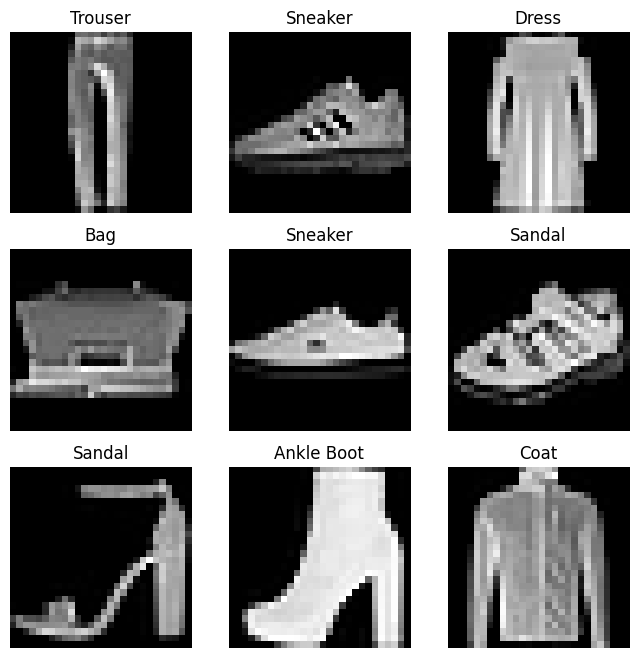

In [16]:
import matplotlib.pyplot as plt

# labels_map은 FashionMNIST 문서에서 가져온것이고 종류는 10가지 임
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1): # 9개의 이미지를 위한 반복문을 시작
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # item()은 학습 데이터 세트의 길이 내에서 무작위 인덱스를 생성하고 무작위로 이미지 하나를 선택
    # training_data 는 6만개.
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i) # 현재의 서브플롯(이미지가 표시될 위치)을 3x3 그리드에서 i번째 위치로 설정
    plt.title(labels_map[label])
    plt.axis("off") # 여기서 축은 필요없으니까 off로 함
    # Matplotlib은 기본 컬러맵을 사용하여 이미지를 표현. 기본 컬러맵은 viridis
    plt.imshow(img.squeeze(), cmap="gray") # img.squeeze()로 차원을 축소하여 plt.imshow() 함수에 적합한 2D 형태로 만든다.
    # cmap='gray' 하면 흑백으로.. 근데 기본은 형광임.
    # 28 by 28로 이미지를 출력하게끔..img.squeeze()는 이미지의 차원을 축소시키는데 사용됩니다 (예: 1x28x28에서 28x28로).
plt.show()

DataLoader는 배치 사이즈에 따라 데이터를 배치로 나누고, 모델 학습이나 평가 시에 데이터를 효율적으로 로드할 수 있도록 도와줍니다.

 PyTorch의 DataLoader를 사용하여 학습 데이터(training_data)와 테스트 데이터(test_data)를 배치로 로딩하고, 테스트 데이터로더에서 첫 번째 배치의 형태(shape)와 데이터 타입을 출력하는 과정

Dataset 을 DataLoader 의 인자로 전달합니다. 이는 데이터셋을 순회 가능한 객체(iterable)로 감싸고, 자동화된 배치(batch), 샘플링(sampling),
섞기(shuffle) 및 다중 프로세스로 데이터 불러오기(multiprocess data loading)를 지원합니다. 여기서는 배치 크기(batch size)를 64로 정의합니다.
즉, 데이터로더(dataloader) 객체의 각 요소는 64개의 특징(feature)과 정답(label)을 묶음(batch)으로 반환합니다.



In [17]:
60000 / 64
# 가중치가 어떻게 업데이트되나?
# 배치단위로 가중치 업데이트됨. 배치사이즈가 64이면 64개가 되고나서 한번에 가중치 업데이트됨.
# 스텝별로 가중치 업데이트가 됨

937.5

In [32]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}") # [N, C, H, W]는 일반적으로 이미지 데이터의 차원. 각각 배치 크기(N), 채널 수(C), 높이(H), 너비(W)를 의미
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## 모델 만들기
PyTorch에서 신경망 모델은 nn.Module을 상속받는 클래스(class)를 생성하여 정의합니다. ``__init__`` 함수에서 신경망의 계층(layer)들을 정의하고 ``forward`` 함수에서 신경망에 데이터를 어떻게 전달할지 지정합니다. 가능한 경우 GPU로 신경망을 이동시켜 연산을 가속(accelerate)합니다.



#### 학습을 위한 장치 얻기
가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고 합니다. torch.cuda가 사용 가능한지 확인해보고, 그렇지 않으면 CPU를 계속 사용합니다.

#### 클래스 정의하기
신경망 모델을 nn.Module 의 하위클래스로 정의하고, __init__ 에서 신경망 계층들을 초기화합니다. nn.Module 을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현합니다.

In [33]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [34]:
# 학습에 사용할 CPU나 GPU, MPS 장치를 얻습니다.
# 코드를 보면.. pytorch는 pythonic함.(객체지향)
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module): # nn.Module을 상속받아 정의
    def __init__(self):
        super().__init__() # 메소드 내에서 모델의 레이어들이 초기화
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 행렬곱. 가중치 계산해서 들어갈것임. 512는 출력
            nn.ReLU(), # 비선형. 0보다작으면 0 0보다크면 자신으로.. relu가 비활성화 하는 역할
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
            # linear 쓰다가 relu 쓰는 이유.. 선형만 쓰게되면 한계가 있음.
            # 비선형 변환을 위해서 일반화의외의 다른것들을 하기위해서 하는것임.
            # 보통 레이어가 복잡하면 복잡할수록 어려운것을 할 수 있음.(뇌 세포가 많으면 어려운 문제 해결할수 있는것처럼)
            # 물론 과적합안되게끔 컨트롤 해야함.
            # 입력사이즈가 지금은 별로 의미 없으니까 512 512를 10개 해도됨. 굳이 안줄여도됨. 가중치를 크게 해서 거르는거니까..
            # 숫자를 줄여간다는 것을 의무감처럼 생각할 필요 없고 레이어를 많이하면 됨.
        )

    def forward(self, x): # 모델이 입력 데이터를 받아 출력까지 어떻게 처리할지를 정의
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)
# 출력했을때, bias=True는 편차(b)가 있다 라는 뜻.. 계산할때 편차 적용된다라는 의미임

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## 모델 매개변수 최적화하기
모델을 학습하려면 손실 함수(loss function)와
옵티마이저(optimizer)가 필요합니다.



In [35]:
# nn.CrossEntropyLoss()는 내부적으로 소프트맥스 계산을 포함. 모델의 출력 레이어에서 별도로 소프트 맥스를 적용할 필요가 없습니다.
# sigmoid 쓸때에는 다른 손실함수가 있음.
loss_fn = nn.CrossEntropyLoss() # 비용함수. LossFunction.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # lr=0.001(아주 작은수를 넣었음)

- 각 학습 단계(training loop)에서 모델은 (배치(batch)로 제공되는) 학습 데이터셋에 대한 예측을 수행하고,
예측 오류를 역전파하여 모델의 매개변수를 조정합니다.
- optimizer.zero_grad() 호출은 가중치(파라미터) 자체를 0으로 만드는 것이 아니라, 가중치의 기울기(gradient. 가중치 편미분해서 순간변화율 구하고 어느 방향 갈지.. 0일때 가장 손실이 적기때문에 0으로 초기화하는데,그리고 이전에 했던것들이 영향을 줄수 있기때문에 초기화하는 과정이필요함. 즉 0 에가까울때 가중치가 뭐냐를 찾는 것임(파라미터))를 0으로 초기화하는 과정이며 이는 각 배치마다 독립적으로 기울기를 계산할 수 있게 하여, 가중치 업데이트가 정확하게 이루어지도록 돕습니다.


In [36]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device) # device한것은 gpu쓰겠다(cuda)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)
        # 배치단위로 비용이 구해짐!(스텝별로..) --> 데이터포인트별로 되는게 아님.

        # 역전파
        optimizer.zero_grad() # 전 배치에서 계산된 그래디언트를 0으로 초기화. 그전에것이 남아 있으면 왜곡이 발생할 수 있어서 초기화.
        # 그래디언트를 0으로 초기화하는것이지 가중치를 초기화하는 것이 아님.
        # forward로 가중치 계산. 그것을 backward로 역전파를 함
        loss.backward()
        # 가중치별로 편미분해서 배치단위로 업데이트 함
        optimizer.step()

        if batch % 100 == 0: # 전부 표시하긴 그러니까 100개단위로 출력하기
            loss, current = loss.item(), (batch + 1) * len(X)
            # item은 뽑기. batch에 1더한것은 for문에 보면.. 0부터 시작할 수 있으니 +1 함
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            # loss:>7f는 손실 값(loss)을 오른쪽 정렬로, 최소 7자리의 너비를 가진 부동소수점 숫자로 출력

모델이 학습하고 있는지를 확인하기 위해 테스트 데이터셋으로 모델의 성능을 확인합니다.



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [37]:
def test(dataloader, model, loss_fn): # 테스트하는거니까 최적화(optimizer)는 필요없어서 안함
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # 평가함수는 model.eval()을 사용
    test_loss, correct = 0, 0
    with torch.no_grad(): # 학습이아니라 평가하는거라서 no_grad()를 사용. 가중치 업데이트 하는것이 목적이아니라서..
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # 예측값중 가장 높은 인덱스(0-9중에 모델이 가장 확신하는 숫자)와 실제값이 일치하는 요소의 개수를 합산한 값(sum)을 숫자로 변환하여
            # correct에 추가
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # 여기서 type은 float아니라 int로 해도됨. 왜냐면 개수는 다 정수니까..
            # pred.argmax(1) == y 는 0에서 9까지 분류한것을 맞춘것. 10개중에 가장 큰거 중에 하나를 반환하는 것.
    test_loss /= num_batches # 배치별 평균 손실
    correct /= size # 정확도가 나옴
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    # 출력을 백분률.(100곱함) 자릿수. 오른쪽정렬 설정

학습 단계는 여러번의 반복 단계 (*에폭(epochs)*) 를 거쳐서 수행됩니다. 각 에폭에서는 모델은 더 나은 예측을 하기 위해  매개변수를 학습합니다.
각 에폭마다 모델의 정확도(accuracy)와 손실(loss)을 출력합니다; 에폭마다 정확도가 증가하고 손실이 감소하는 것을 보려고 합니다.



In [38]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")
# 60000 / 64 가 937.X 였음. 즉, 938개 나오는것을 100개단위로 나눠서 확인
# 64, 64*100 + 64(=6464), 64+200 + 64(=12864), ...

Epoch 1
-------------------------------
loss: 2.296077  [   64/60000]
loss: 2.285810  [ 6464/60000]
loss: 2.272870  [12864/60000]
loss: 2.264748  [19264/60000]
loss: 2.243318  [25664/60000]
loss: 2.216516  [32064/60000]
loss: 2.219172  [38464/60000]
loss: 2.188477  [44864/60000]
loss: 2.188949  [51264/60000]
loss: 2.156931  [57664/60000]
Test Error: 
 Accuracy: 40.8%, Avg loss: 2.151450 

Epoch 2
-------------------------------
loss: 2.154909  [   64/60000]
loss: 2.150592  [ 6464/60000]
loss: 2.098852  [12864/60000]
loss: 2.114712  [19264/60000]
loss: 2.060320  [25664/60000]
loss: 2.002154  [32064/60000]
loss: 2.022926  [38464/60000]
loss: 1.951760  [44864/60000]
loss: 1.962135  [51264/60000]
loss: 1.881323  [57664/60000]
Test Error: 
 Accuracy: 60.7%, Avg loss: 1.886612 

Epoch 3
-------------------------------
loss: 1.913418  [   64/60000]
loss: 1.887083  [ 6464/60000]
loss: 1.779679  [12864/60000]
loss: 1.811445  [19264/60000]
loss: 1.692524  [25664/60000]
loss: 1.655484  [32064/600

PyTorch에서 모델을 저장하고 불러오는 표준 방법

전체 모델 저장 및 로드하기:
- PyTorch에서는 torch.save()를 사용하여 전체 모델을 저장할 수 있으며, torch.load()로 모델을 불러올 수 있습니다. 이 방법은 모델의 구조와 모델의 매개변수를 모두 저장합니다. 하지만, 이 방법은 권장되지 않는 경우가 많습니다. 모델 클래스의 정의가 변경되면, 저장된 모델을 불러올 때 문제가 발생할 수 있기 때문입니다.
- 모델의 state_dict 저장 및 로드하기 (권장 방법):
모델의 매개변수(가중치와 편향)만 저장하는 것이 일반적이며 권장되는 방법입니다. 이 방법은 모델의 구조는 저장하지 않고, 매개변수만 저장합니다. 모델을 로드할 때는 먼저 모델의 인스턴스를 생성하고 state_dict를 로드합니다.
- 체크포인트 저장하기:
학습 중에 모델의 state_dict 뿐만 아니라, 옵티마이저의 state_dict, 에폭 번호, 최고 기록 등과 같은 추가 정보를 저장할 수 있습니다. 이 방법은 학습 과정을 중단했다가 다시 시작할 때 유용합니다. 확장자는 .pth
- ONNX 형식으로 내보내기:
PyTorch 모델을 다른 프레임워크에서 사용할 수 있도록 Open Neural Network Exchange(ONNX) 형식으로 내보낼 수 있습니다. 이 방법은 PyTorch 외의 다른 환경에서 모델을 배포할 때 유용합니다.
.pth 또는 .pt 파일로 state_dict을 저장하는 것이 가장 일반적이고 권장되는 방법입니다. 이 방법은 모델의 가벼운 매개변수만 저장하며, 모델 구조의 변경에 유연하게 대응할 수 있게 해줍니다. 다만, 모델을 로드할 때는 저장할 때 사용한 동일한 모델 클래스를 사용하여 인스턴스를 먼저 생성해야 합니다.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 모델 저장하기
모델을 저장하는 일반적인 방법은 (모델의 매개변수들을 포함하여) 내부 상태 사전(internal state dictionary)을
직렬화(serialize)하는 것입니다.



In [40]:
# .pth 또는 .pt 파일로 state_dict을 저장하는 것이 가장 일반적이고 권장되는 방법
import os
# Define the save path
save_path = "/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/model.pth"

# Ensure directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)
# exist_ok = True 는 해당 경로의 디렉터리가 이미 존재할 경우 오류를 발생시키지 않고 넘어가도록 설정.
# 이미 해당 경로에 디렉터리가 존재해도 코드 실행 시 문제가 발생하지 않게끔 함. 즉 디렉터리가 없으면 생성 하는 것임

In [41]:
# 모델의 매개변수(가중치와 편향)만 저장
torch.save(model.state_dict(), save_path)
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## 모델 불러오기

모델을 불러오는 과정에는 모델 구조를 다시 만들고 상태 사전을 모델에 불러오는 과정이 포함됩니다.



In [ ]:
model = NeuralNetwork().to(device) # 저장할 때 사용한 동일한 모델 클래스를 사용하여 인스턴스를 먼저 생성
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

이제 이 모델을 사용해서 예측을 할 수 있습니다.



In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval() # 평가(evaluation) 모드로 설정
x, y = test_data[0][0], test_data[0][1] # 테스트 데이터셋에서 첫 번째 샘플(이미지)과 그에 해당하는 레이블을 가져옵니다.
with torch.no_grad(): # 평가 또는 추론 시에는 모델을 업데이트할 필요가 없으므로 그라디언트를 계산할 필요가 없습니다.
    x = x.to(device) # 테스트 샘플을 현재 설정된 장치(CPU 또는 GPU)로 이동
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y] # 모델의 예측 결과 중 가장 높은 값을 가지는 인덱스와 실제 레이블에 해당하는 클래스의 이름
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


- torch: 이것은 메인 PyTorch 라이브러리입니다. 여기에는 GPU를 통한 가속을 통한 텐서 계산 지원, 신경망 훈련을 용이하게 하는 자동 차별화, 모델 구축 및 훈련을 위한 다양한 유틸리티가 포함됩니다.
- torch.nn: 레이어, 활성화 함수, 손실 함수와 같은 신경망의 구성 요소를 제공하는 PyTorch의 하위 모듈입니다. 신경망의 아키텍처를 정의하는 데 필수적입니다.
- torch.nn.function: 이 모듈에는 torch.nn 레이어에서 사용되는 기능이 포함되어 있습니다. 입력 데이터 및 가중치에 이러한 함수를 직접 사용할 수 있으므로 일부 작업에 더 많은 유연성을 제공합니다. 여기에는 활성화, 손실 계산 및 상태(즉, 가중치)를 유지하지 않는 다양한 기타 작업을 위한 함수가 포함됩니다.
- torch.optim: 이 하위 모듈은 SGD(Stochastic Gradient Descent), Adam 등과 같은 신경망 훈련을 위한 최적화 알고리즘을 제공합니다. 이러한 최적화 프로그램은 계산된 기울기를 기반으로 네트워크의 가중치를 업데이트하는 데 사용됩니다.
- torchvision: 이미지 데이터 작업을 위한 유틸리티를 제공하는 PyTorch 프로젝트의 패키지입니다. 여기에는 사전 정의된 데이터세트(예: MNIST, CIFAR10, FashionMNIST), 모델 아키텍처(예: ResNet, AlexNet) 및 전처리를 위한 일반적인 이미지 변환이 포함됩니다.
- torchvision.transforms: 일반적인 이미지 변환을 제공하는 torchvision 내의 모듈입니다. 이는 이미지를 신경망에 공급하기 전에 데이터 증대 및 이미지 전처리에 사용될 수 있습니다. 예로는 크기 조정, 정규화, 텐서로 변환 등이 있습니다.
- SubsetRandomSampler: 교체 없이 데이터세트에서 요소를 무작위로 샘플링하는 데 사용되는 도구입니다. 데이터 세트를 훈련 및 검증/테스트 세트로 분할하거나 모델 훈련을 위해 사용자 정의 데이터 샘플링 전략을 구현하려는 경우에 특히 유용